In [1]:
import os
import cv2
import numpy as np

from tqdm.notebook import tqdm
from random import randint, choices

from tensorflow.keras import models, layers, losses, optimizers, metrics, utils
from tensorflow.keras.preprocessing.image import random_rotation, random_zoom

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

from inout import *

In [2]:
files = os.listdir("flowers/")

In [3]:
def reshape(image):
    if len(image.shape)<3:
        image = np.expand_dims(image, axis=2)
        return np.concatenate([image]*3, axis=2)
    if image.shape[2]>3:
        return image[:,:,:3]
    return image

In [4]:
dataset = np.array([reshape(read_image(file, 64, 64)) for file in tqdm(files)])

  0%|          | 0/733 [00:00<?, ?it/s]

In [5]:
y = list(map(
    lambda f: '_'.join(
        f.split("_")[:-1]
    ), files
))

In [6]:
enc = LabelEncoder().fit(y)
y = enc.transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=123)

In [8]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

In [9]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([61, 68, 53, 58, 61, 51, 67, 49, 60, 58], dtype=int64))

In [10]:
import matplotlib.pyplot as plt

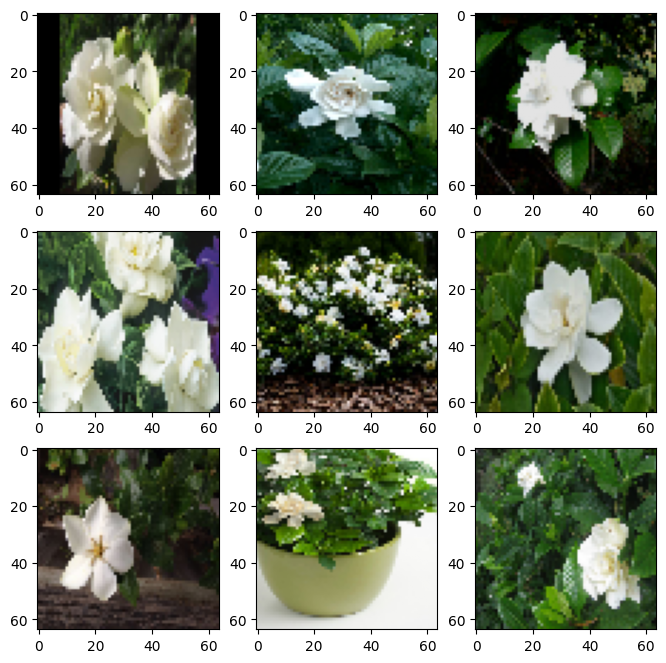

In [11]:
f, ax = plt.subplots(3,3, figsize=(8,8))
for i, image in enumerate(choices(X_train[y_train==3], k=9)):
    r,c = int(i//3), int(i%3)
    ax[r,c].grid(False)
    ax[r,c].imshow(image)

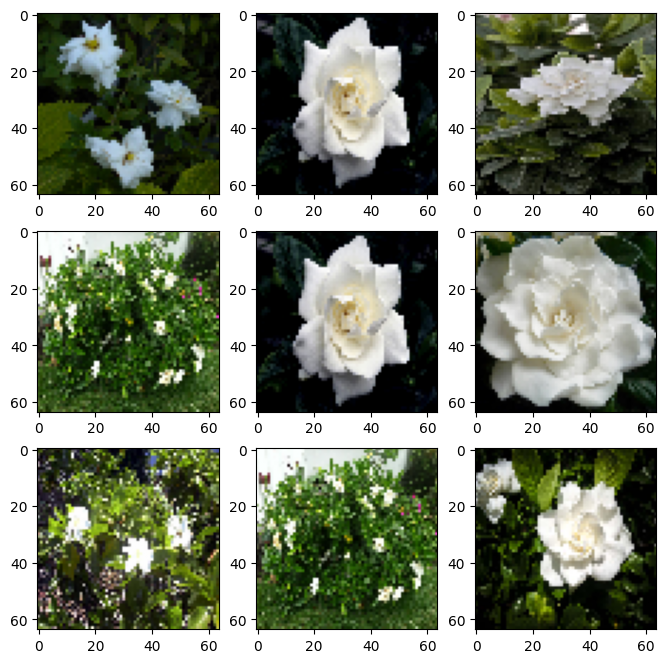

In [12]:
f, ax = plt.subplots(3,3, figsize=(8,8))
for i, image in enumerate(choices(X_test[y_test==3], k=9)):
    r,c = int(i//3), int(i%3)
    ax[r,c].grid(False)
    ax[r,c].imshow(image)

In [17]:
cnn = models.Sequential([
    layers.Conv2D(
        filters=16, 
        kernel_size=5,
        padding="same",
        activation="linear", 
        name="conv_1"
    ),
    layers.MaxPool2D(
        pool_size=(2,2),
        padding="same",
        name="pool_1"
    ),
    layers.BatchNormalization(),
    layers.Conv2D(
        filters = 32, 
        kernel_size = 5, 
        activation="relu", 
        padding="same",
        name="conv_2"
    ),
    layers.GlobalMaxPool2D(name="max_pool"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(64, activation="relu"),
    layers.Dense(len(enc.classes_), activation="softmax", name="out", activity_regularizer="l2")
])

In [22]:
cnn.compile("adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [23]:
cnn.fit(X_train, y_train, batch_size=8, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
74/74 [==============================] - 2s 18ms/step - loss: 0.7460 - acc: 0.7235 - val_loss: 1.5086 - val_acc: 0.5782
Epoch 2/25
74/74 [==============================] - 1s 14ms/step - loss: 0.7549 - acc: 0.7628 - val_loss: 1.6038 - val_acc: 0.5170
Epoch 3/25
74/74 [==============================] - 1s 13ms/step - loss: 0.6701 - acc: 0.7543 - val_loss: 1.5586 - val_acc: 0.5510
Epoch 4/25
74/74 [==============================] - 1s 13ms/step - loss: 0.5327 - acc: 0.8276 - val_loss: 1.6276 - val_acc: 0.5306
Epoch 5/25
74/74 [==============================] - 1s 13ms/step - loss: 0.7141 - acc: 0.7747 - val_loss: 1.5174 - val_acc: 0.5646
Epoch 6/25
74/74 [==============================] - 1s 13ms/step - loss: 0.7699 - acc: 0.7543 - val_loss: 1.5863 - val_acc: 0.5578
Epoch 7/25
74/74 [==============================] - 1s 13ms/step - loss: 0.6551 - acc: 0.7935 - val_loss: 1.6137 - val_acc: 0.5170
Epoch 8/25
74/74 [==============================] - 1s 13ms/step - loss: 0.8837 - a